# Sales Forecasting

In [1]:
import pandas as pd

### Loading Dataset

In [2]:
filepath = r"C:\Users\eDominer\Python Project\Sales Prediction\sales_prediction.csv"

In [3]:
import chardet

# Detect the encoding
with open(filepath, 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding to read the file
encoding = result['encoding']


In [4]:
df = pd.read_csv(filepath,encoding=encoding)

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Spltting the data set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Item_Outlet_Sales',axis=1)
y= df['Item_Outlet_Sales']
SEED = 42

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5966, 11), (2557, 11), (5966,), (2557,))

In [11]:
y_train.head()

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

### Feature Selection

In [12]:
#Making Temporrary Copy of the data
X_train_c = X_train.copy()

In [13]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [14]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
num_vars = X_train_c.select_dtypes(exclude=['object'])

In [16]:
num_vars.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [17]:
num_vars.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [18]:
num_vars.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

### Importing Seaborn and Matplotlib

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
def plot_num_vars(dataframe,col_name):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    sns.histplot(x=dataframe[col_name], ax=ax[0])
    sns.boxplot(y=dataframe[col_name], ax=ax[1])



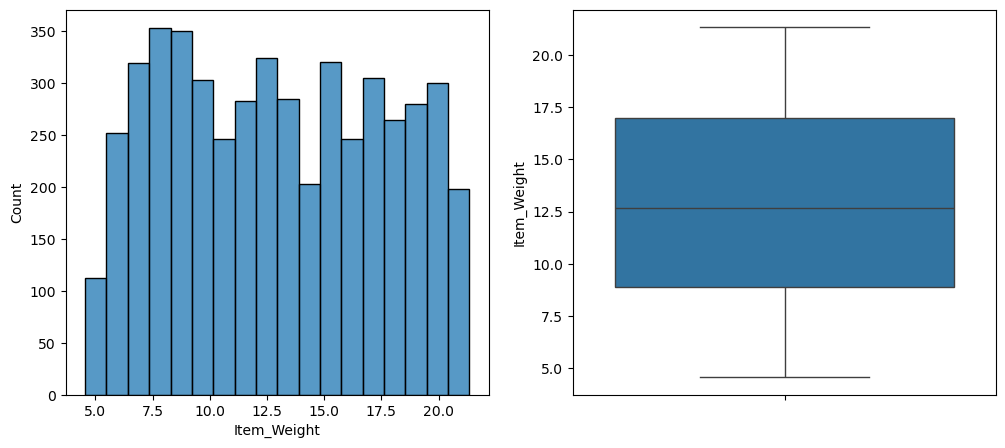

In [21]:
plot_num_vars(num_vars,'Item_Weight')

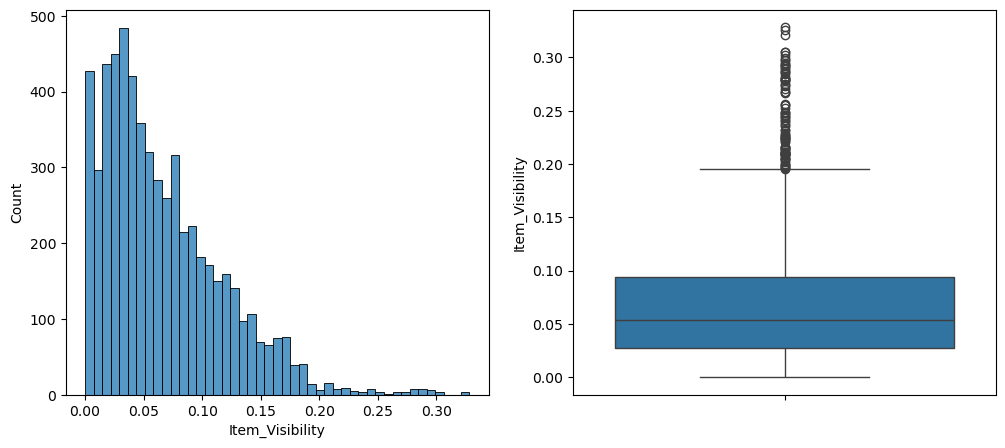

In [22]:
plot_num_vars(num_vars,'Item_Visibility')

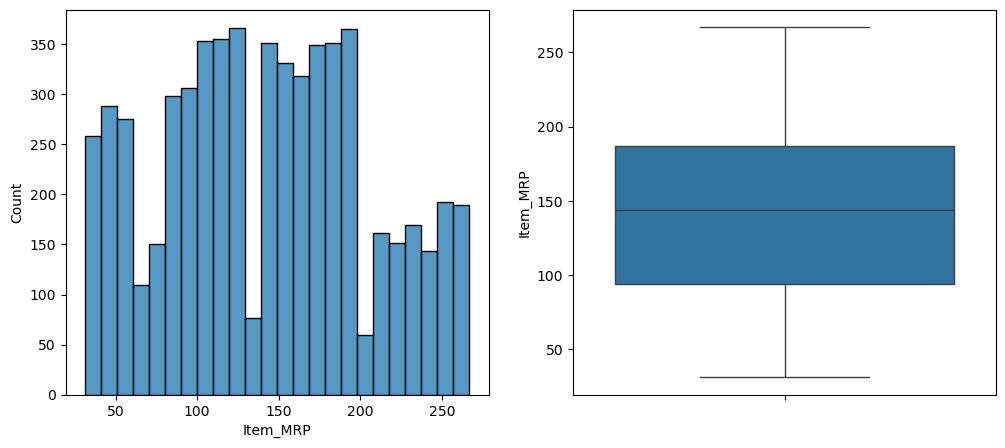

In [23]:
plot_num_vars(num_vars,'Item_MRP')

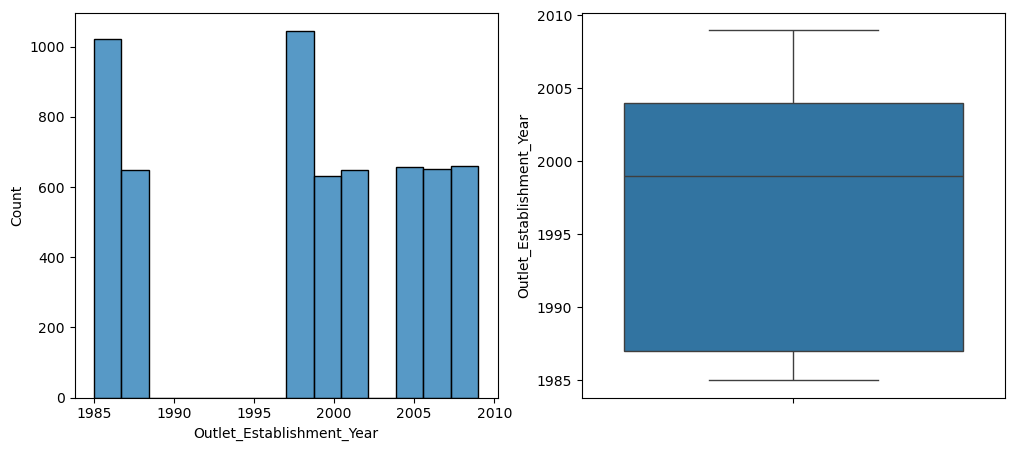

In [24]:
plot_num_vars(num_vars,'Outlet_Establishment_Year')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

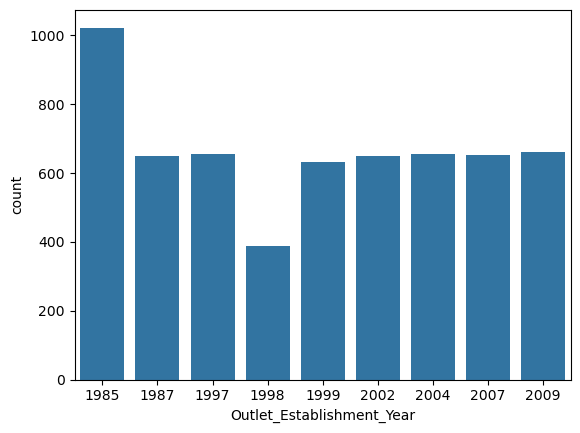

In [25]:
sns.countplot(x='Outlet_Establishment_Year',data=X_train_c)

### Checking Only object type data

In [26]:
object_vars = X_train_c.select_dtypes(include=['object'])

In [27]:
object_vars.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [28]:
object_vars.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [29]:
object_vars.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [30]:
object_vars.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [31]:
object_vars['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [32]:
object_vars['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [33]:
object_vars['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64

In [34]:
object_vars['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [35]:
object_vars['Outlet_Size'].value_counts()

Outlet_Size
Medium    1960
Small     1667
High       649
Name: count, dtype: int64

In [36]:
object_vars['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [37]:
object_vars['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

## Data Cleaning and Feature Selection

#### Step 1: Creating High level Item Types

In [38]:
X_train_c['Item_Identifier'].apply(lambda x: x[0:2])

1921    FD
655     NC
2229    FD
2537    FD
3528    FD
        ..
5734    FD
5191    FD
5390    NC
860     FD
7270    NC
Name: Item_Identifier, Length: 5966, dtype: object

In [39]:
#X_train_c['Item_Identifier'].apply(lambda x: x[0:2]).value_counts()

X_train_c['Item_Identifier'].str[0:2].value_counts() #Another way to do the same thing but it is faster than the apply method

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [40]:
def create_data_types(dataframe):
    dataframe['Item_Type'] = dataframe['Item_Identifier'].str[0:2]
    dataframe['Item_Type'] = dataframe['Item_Type'].map({
                                                    'FD':'Food',
                                                    'NC':'Non-Consumable',
                                                    'DR':'Drinks'
                                                    })
    return dataframe

In [41]:
X_train_c = create_data_types(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


#### Step 2: Handling Missing Values for Item Weight

In [42]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [43]:
X_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values('Item_Identifier')

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [44]:
ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight',index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_PIVOT

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1517,NCZ30,6.590
1518,NCZ41,19.850
1519,NCZ42,10.500
1520,NCZ53,9.600


In [45]:
ITEM_ID_WEIGHT_MAPPING = ITEM_ID_WEIGHT_PIVOT.set_index('Item_Identifier').to_dict()['Item_Weight']
list(ITEM_ID_WEIGHT_MAPPING.items())[0:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [46]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight',index='Item_Type',aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_PIVOT

,Item_Type,Item_Weight
0,Drinks,11.80
1,Food,12.80
2,Non-Consumable,13.05


In [47]:
ITEM_TYPE_WEIGHT_MAPPING = ITEM_TYPE_WEIGHT_PIVOT.set_index('Item_Type').to_dict()['Item_Weight']
list(ITEM_TYPE_WEIGHT_MAPPING.items())

[('Drinks', 11.8), ('Food', 12.8), ('Non-Consumable', 13.05)]

In [48]:
def impute_item_weight(dataframe):
    dataframe['Item_Weight'] = dataframe['Item_Weight'].fillna(dataframe['Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    dataframe['Item_Weight'] = dataframe['Item_Weight'].fillna(dataframe['Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))
    return dataframe

In [49]:
X_train_c = impute_item_weight(X_train_c)

In [50]:
X_train_c

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.750,Low Fat,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.600,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Food,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Food,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Non-Consumable,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.350,low fat,0.054363,Food,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [51]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Step 3: Handling Missing Values for Outlet_Size

In [52]:
X_train_c.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  Small          1312
                   High            649
                   Medium          631
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
Name: count, dtype: int64

In [53]:
OUTPUT_TYPE_SIZE_PIVOT = X_train_c.pivot_table(
    values='Outlet_Size', 
    index='Outlet_Type', 
    aggfunc=(lambda x: x.dropna().mode()[0])
).reset_index()

In [54]:
OUTPUT_TYPE_SIZE_PIVOT

,Outlet_Type,Outlet_Size
0,Grocery Store,Small
1,Supermarket Type1,Small
2,Supermarket Type2,Medium
3,Supermarket Type3,Medium


In [55]:
OUTPUT_TYPE_SIZE_MAPPING = OUTPUT_TYPE_SIZE_PIVOT.set_index('Outlet_Type').to_dict()['Outlet_Size']
OUTPUT_TYPE_SIZE_MAPPING

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [56]:
def impute_outlet_size(dataframe):
    dataframe['Outlet_Size'] = dataframe['Outlet_Size'].fillna(dataframe['Outlet_Type'].map(OUTPUT_TYPE_SIZE_MAPPING))
    return dataframe

In [57]:
X_train_c = impute_outlet_size(X_train_c)

In [58]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [59]:
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,Small,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.60,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,Small,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


#### Step 4: Standardize Item_Fat_Content Categories

In [60]:
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [61]:
def fix_fat_content(dataframe):
    dataframe['Item_Fat_Content'] = dataframe['Item_Fat_Content'].replace({
        'LF':'Low_Fat',
        'low fat':'Low_Fat',
        'reg':'Regular',
        'Low Fat':'Low_Fat'
        })
    dataframe.loc[dataframe['Item_Type']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
    return dataframe

In [62]:
X_train_c = fix_fat_content(X_train_c)

In [63]:
X_train_c

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,Food,116.6466,OUT010,1998,Small,Tier 3,Grocery Store
655,NCJ42,19.750,Non-Edible,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.600,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low_Fat,0.118342,Food,222.6088,OUT045,2002,Small,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Food,139.1838,OUT010,1998,Small,Tier 3,Grocery Store
5191,FDC41,15.600,Low_Fat,0.117575,Food,75.6670,OUT017,2007,Small,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Non-Edible,0.018944,Non-Consumable,237.3590,OUT045,2002,Small,Tier 2,Supermarket Type1
860,FDL46,20.350,Low_Fat,0.054363,Food,117.9466,OUT017,2007,Small,Tier 2,Supermarket Type1


In [64]:
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat       2723
Regular       2106
Non-Edible    1137
Name: count, dtype: int64

In [65]:
X_train_c.groupby('Item_Type')['Item_Fat_Content'].value_counts()

Item_Type       Item_Fat_Content
Drinks          Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-Consumable  Non-Edible          1137
Name: count, dtype: int64

In [66]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [67]:
def PrepareData(dataframe):
    dataframe = create_data_types(dataframe)
    dataframe = impute_item_weight(dataframe)
    dataframe = impute_outlet_size(dataframe)
    dataframe = fix_fat_content(dataframe)
    return dataframe

In [68]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [69]:
X_train = PrepareData(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [70]:
X_test = PrepareData(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Handling Categorical Data 

In [71]:
Categorical_data = X_train.select_dtypes(include=['object'])

In [72]:
Categorical_data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non-Edible,Non-Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [73]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoder.fit(Categorical_data)

OneHotEncoder(handle_unknown='ignore')

In [74]:
one_hot_encoder_features_names = one_hot_encoder.get_feature_names_out(input_features=Categorical_data.columns)
one_hot_encoder_features_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [75]:
num_data_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
num_data_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [76]:
Categorical_data_train = X_train.select_dtypes(include=['object'])

In [77]:
X_train_cat_ohe = pd.DataFrame(one_hot_encoder.transform(Categorical_data_train).toarray(),columns=one_hot_encoder_features_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [78]:
X_train_preprocessed = pd.concat([num_data_train,X_train_cat_ohe],axis=1)

In [79]:
X_train_preprocessed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [80]:
final_columns = X_train_preprocessed.columns.values
final_columns

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [81]:
num_data_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
Categorical_data_test = X_test.select_dtypes(include=['object'])
X_test_cat_ohe = pd.DataFrame(one_hot_encoder.transform(Categorical_data_test).toarray(),columns=one_hot_encoder_features_names)
X_test_preprocessed = pd.concat([num_data_test,X_test_cat_ohe],axis=1)
X_test_preprocessed = X_test_preprocessed[final_columns]

In [82]:
X_test_preprocessed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

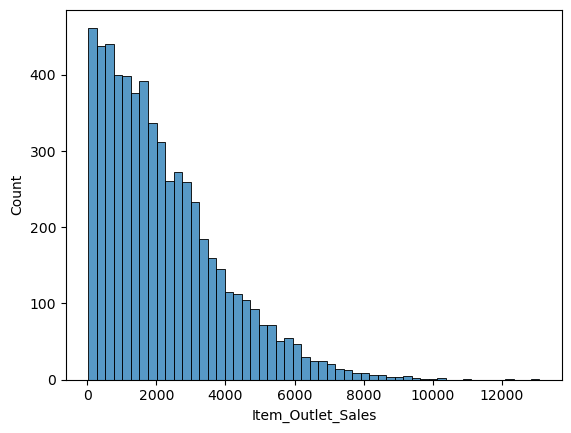

In [83]:
sns.histplot(y_train)

## Model Selection

In [84]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np

In [85]:
def train_and_eval_model(model,X_train,y_train,cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2','neg_mean_squared_error'),)
    print("Model:", model)
    r2_scores = cv_results['test_r2']
    print("R2 CV Scores:", r2_scores)
    print("R2 CV Mean Score:", np.mean(r2_scores))
    print("R2 CV Std Score:", np.std(r2_scores))

    # rmse_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = cv_results['test_neg_mean_squared_error']
    rmse_scores = [-1 * x for x in rmse_scores]  # Convert to positive RMSE
    print("RMSE CV Scores:", rmse_scores)
    print("RMSE CV Mean Score:", np.mean(rmse_scores))
    print("RMSE CV Std Score:", np.std(rmse_scores))

In [86]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf,X_train=X_train_preprocessed,y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV Scores: [0.57060768 0.5268083  0.54281021 0.55421798 0.52017727]
R2 CV Mean Score: 0.5429242875459817
R2 CV Std Score: 0.01828158855152387
RMSE CV Scores: [1218963.1240677582, 1365347.3875564614, 1393829.1912724907, 1332716.5728501314, 1445005.1390877145]
RMSE CV Mean Score: 1351172.2829669113
RMSE CV Std Score: 75690.19122295671


In [87]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_preprocessed,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.6065274  0.59366925 0.57356358 0.60924345 0.55022613]
R2 CV Mean Score: 0.5866459646024772
R2 CV Std Score: 0.022148578096336337
RMSE CV Scores: [1116993.8646168043, 1172426.781663333, 1300071.742903459, 1168211.588855091, 1354511.809401515]
RMSE CV Mean Score: 1222443.1574880404
RMSE CV Std Score: 89476.90243399558


In [88]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_preprocessed,y_train=y_train)

c:\Users\eDominer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\eDominer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\eDominer\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\eDominer\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\eDominer\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _w

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV Mean Score: 0.5613284973532673
R2 CV Std Score: 0.0205841656268121
RMSE CV Scores: [1169763.2646245079, 1318687.3537974567, 1387118.8957487808, 1240564.6297704785, 1368229.698401012]
RMSE CV Mean Score: 1296872.768468447
RMSE CV Std Score: 81288.9703744092


In [89]:
xgr = xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_preprocessed,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV Scores: [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
R2 CV Mean Score: 0.5577825481764618
R2 CV Std Score: 0.021778582707669483
RMSE CV Scores: [1199937.2968221407, 1272051.5141113698, 1389551.4543685357, 1243872.5429835618, 14325

In [90]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_preprocessed,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

### Handling Categorical Value
#### Expt 2: All categorical columns - Native Handling

In [91]:
X_train_copy = X_train.copy().drop(columns='Item_Identifier')

cat_cols = X_train_copy.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train_copy.select_dtypes(exclude=['object']).columns.tolist()

cat_cols,num_cols

(['Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [92]:
X_train_copy[cat_cols] = X_train_copy[cat_cols].astype('category')
n_categorical_features = len(cat_cols)
n_numerical_features = len(num_cols)

X_train_copy = X_train_copy[cat_cols + num_cols]

X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Fat_Content           5966 non-null   category
 1   Item_Type                  5966 non-null   category
 2   Outlet_Identifier          5966 non-null   category
 3   Outlet_Size                5966 non-null   category
 4   Outlet_Location_Type       5966 non-null   category
 5   Outlet_Type                5966 non-null   category
 6   Item_Weight                5966 non-null   float64 
 7   Item_Visibility            5966 non-null   float64 
 8   Item_MRP                   5966 non-null   float64 
 9   Outlet_Establishment_Year  5966 non-null   int64   
dtypes: category(6), float64(3), int64(1)
memory usage: 269.1 KB


In [93]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

Categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value= np.nan),
        make_column_selector(dtype_include='category'),
    ),
remainder = "passthrough",
)


hgb = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42, categorical_features=Categorical_mask
        ),
)


train_and_eval_model(model=hgb,X_train=X_train_copy,y_train=y_train)

Model: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E2896B26F0>)])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[True, True,
                                                                     True, True,
                                                                     True, True,
                                                                     False,
                                                                     False,
                                                     

In [94]:
lgbr = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbr,X_train=X_train_copy,y_train=y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 782
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 10
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 10
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

### Handling Categorical Value
#### Expt 3: No Item Identifier - one hot encoded

In [95]:
from sklearn.preprocessing import OneHotEncoder
cat_feature =X_train.select_dtypes(include=['object']).drop(columns='Item_Identifier')
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feature)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feature.columns)

In [96]:
num_features_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_features_train = X_train.select_dtypes(include=['object']).drop(columns='Item_Identifier')
X_train_ohe = pd.DataFrame(ohe.transform(cat_features_train).toarray(),columns=ohe_feature_names)
X_train_final = pd.concat([num_features_train,X_train_ohe],axis=1)

In [97]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.6027587  0.58477918 0.57733175 0.61716814 0.5638745 ]
R2 CV Mean Score: 0.5891824563495011
R2 CV Std Score: 0.01880337124010431
RMSE CV Scores: [1127692.481480547, 1198078.1890232104, 1288583.7544745205, 1144519.8236529506, 1313409.2203101004]
RMSE CV Mean Score: 1214456.6937882656
RMSE CV Std Score: 74798.22643763667


In [98]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.58793884 0.54297938 0.54501125 0.585042   0.54567103]
R2 CV Mean Score: 0.5613284973532673
R2 CV Std Score: 0.0205841656268121
RMSE CV Scores: [1169763.2646245079, 1318687.3537974567, 1387118.8957487808, 1240564.6297704785, 1368229.698401012]
RMSE CV Mean Score: 1296872.768468447
RMSE CV Std Score: 81288.9703744092


In [99]:
xgr = xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV Scores: [0.52348154 0.47860959 0.45772502 0.49196841 0.46576096]
R2 CV Mean Score: 0.48350910211416415
R2 CV Std Score: 0.023122182697374725
RMSE CV Scores: [1352745.2660248447, 1504419.9564659025, 1653227.4119825456, 1518818.8168627333, 1608

In [100]:
lgbm = LGBMRegressor(random_state=SEED)
train_and_eval_model(model=lgbm,X_train=X_train_final,y_train=y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 30
[LightGBM] [Info] Start training from score 2221.272740
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 4773, number of used features: 30
[LightGBM] [Info] Start training from score 2213.452868
[LightGBM] [Warning] Found

### Handling Categorical Value
#### Expt 4: Item Identifier - feature hashed, rest categorical features one hot encoded

In [101]:
from sklearn.feature_extraction import FeatureHasher

In [102]:
X_train['Item_Identifier'].head()

1921    FDN08
655     NCJ42
2229    FDY47
2537    FDN45
3528    FDY16
Name: Item_Identifier, dtype: object

In [103]:
hash_vector_sixe = 50
fh = FeatureHasher(n_features=hash_vector_sixe,input_type='string')
hashed_df = pd.DataFrame(
                        fh.transform(X_train['Item_Identifier'].values.reshape(-1, 1)).toarray(),
                        columns=['H'+str(i) for i in range(hash_vector_sixe)]
                    )

hashed_df.head()

,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H40,H41,H42,H43,H44,H45,H46,H47,H48,H49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
cat_feats =X_train.select_dtypes(include=['object']).drop(columns='Item_Identifier')
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)

In [105]:
num_feats_train = X_train.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_train = X_train.select_dtypes(include=['object']).drop(columns='Item_Identifier')
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_features_train).toarray(),columns=ohe_feature_names)
X_train_final = pd.concat([num_feats_train,hashed_df,X_train_cat_ohe],axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [106]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.60324351 0.58551631 0.57101679 0.61681415 0.54613805]
R2 CV Mean Score: 0.5845457617560487
R2 CV Std Score: 0.024698108181039926
RMSE CV Scores: [1126316.2014432824, 1195951.2938063287, 1307836.11709007, 1145578.1111333712, 1366823.2456020936]
RMSE CV Mean Score: 1228500.9938150293
RMSE CV Std Score: 93599.70764853848


In [107]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.58373521 0.54511057 0.54268847 0.59147074 0.53884171]
R2 CV Mean Score: 0.5603693388425803
R2 CV Std Score: 0.022459485972371747
RMSE CV Scores: [1181696.5707215336, 1312538.0064532764, 1394200.3359573833, 1221345.1747622793, 1388796.4458421865]
RMSE CV Mean Score: 1299715.3067473317
RMSE CV Std Score: 86136.6256078


In [108]:
xgr = xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model=xgr,X_train=X_train_final,y_train=y_train)

Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
R2 CV Scores: [0.53676464 0.48594853 0.47719171 0.53119059 0.4537317 ]
R2 CV Mean Score: 0.496965433032841
R2 CV Std Score: 0.03205266365570525
RMSE CV Scores: [1315037.0772240334, 1483244.1750197741, 1593879.5248123528, 1401559.60291931, 1645108.6

In [109]:
X_test.shape

(2557, 11)

In [110]:
hashed_test_df = pd.DataFrame(fh.transform(X_test['Item_Identifier'].values.reshape(-1, 1)).toarray(),
                              columns=['H'+str(i) for i in range(hash_vector_sixe)])
num_feats_test = X_test.select_dtypes(exclude=['object']).reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include=['object']).drop(columns='Item_Identifier')
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(),columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test,hashed_test_df,X_test_cat_ohe],axis=1)
X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,H0,H1,H2,H3,H4,H5,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,-1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [111]:
X_test_final.shape

(2557, 80)

In [124]:
xgr = xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
xgr.fit(X_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [125]:
y_pred = xgr.predict(X_test_final)

In [114]:
from sklearn.metrics import r2_score, mean_squared_error

In [126]:

print("R2 Score: ",r2_score(y_test,y_pred))
print("RMSE Score: ",mean_squared_error(y_test,y_pred))

R2 Score:  0.542336999238969
RMSE Score:  1281911.1028444585


In [118]:
gb = GradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=gb,X_train=X_train_final,y_train=y_train)

Model: GradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.60324351 0.58551631 0.57101679 0.61681415 0.54613805]
R2 CV Mean Score: 0.5845457617560487
R2 CV Std Score: 0.024698108181039926
RMSE CV Scores: [1126316.2014432824, 1195951.2938063287, 1307836.11709007, 1145578.1111333712, 1366823.2456020936]
RMSE CV Mean Score: 1228500.9938150293
RMSE CV Std Score: 93599.70764853848


In [120]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model=rf,X_train=X_train_final,y_train=y_train)

Model: RandomForestRegressor(random_state=42)
R2 CV Scores: [0.5716225  0.53294609 0.53649891 0.55594914 0.52971919]
R2 CV Mean Score: 0.5453471656289898
R2 CV Std Score: 0.01599441848998281
RMSE CV Scores: [1216082.2319873814, 1347637.3964180727, 1413070.379880983, 1327541.0775757188, 1416269.283072063]
RMSE CV Mean Score: 1344120.0737868438
RMSE CV Std Score: 72993.94045738682


In [121]:
hgb = HistGradientBoostingRegressor(random_state=SEED)
train_and_eval_model(model=hgb,X_train=X_train_final,y_train=y_train)

Model: HistGradientBoostingRegressor(random_state=42)
R2 CV Scores: [0.58373521 0.54511057 0.54268847 0.59147074 0.53884171]
R2 CV Mean Score: 0.5603693388425803
R2 CV Std Score: 0.022459485972371747
RMSE CV Scores: [1181696.5707215336, 1312538.0064532764, 1394200.3359573833, 1221345.1747622793, 1388796.4458421865]
RMSE CV Mean Score: 1299715.3067473317
RMSE CV Std Score: 86136.6256078


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

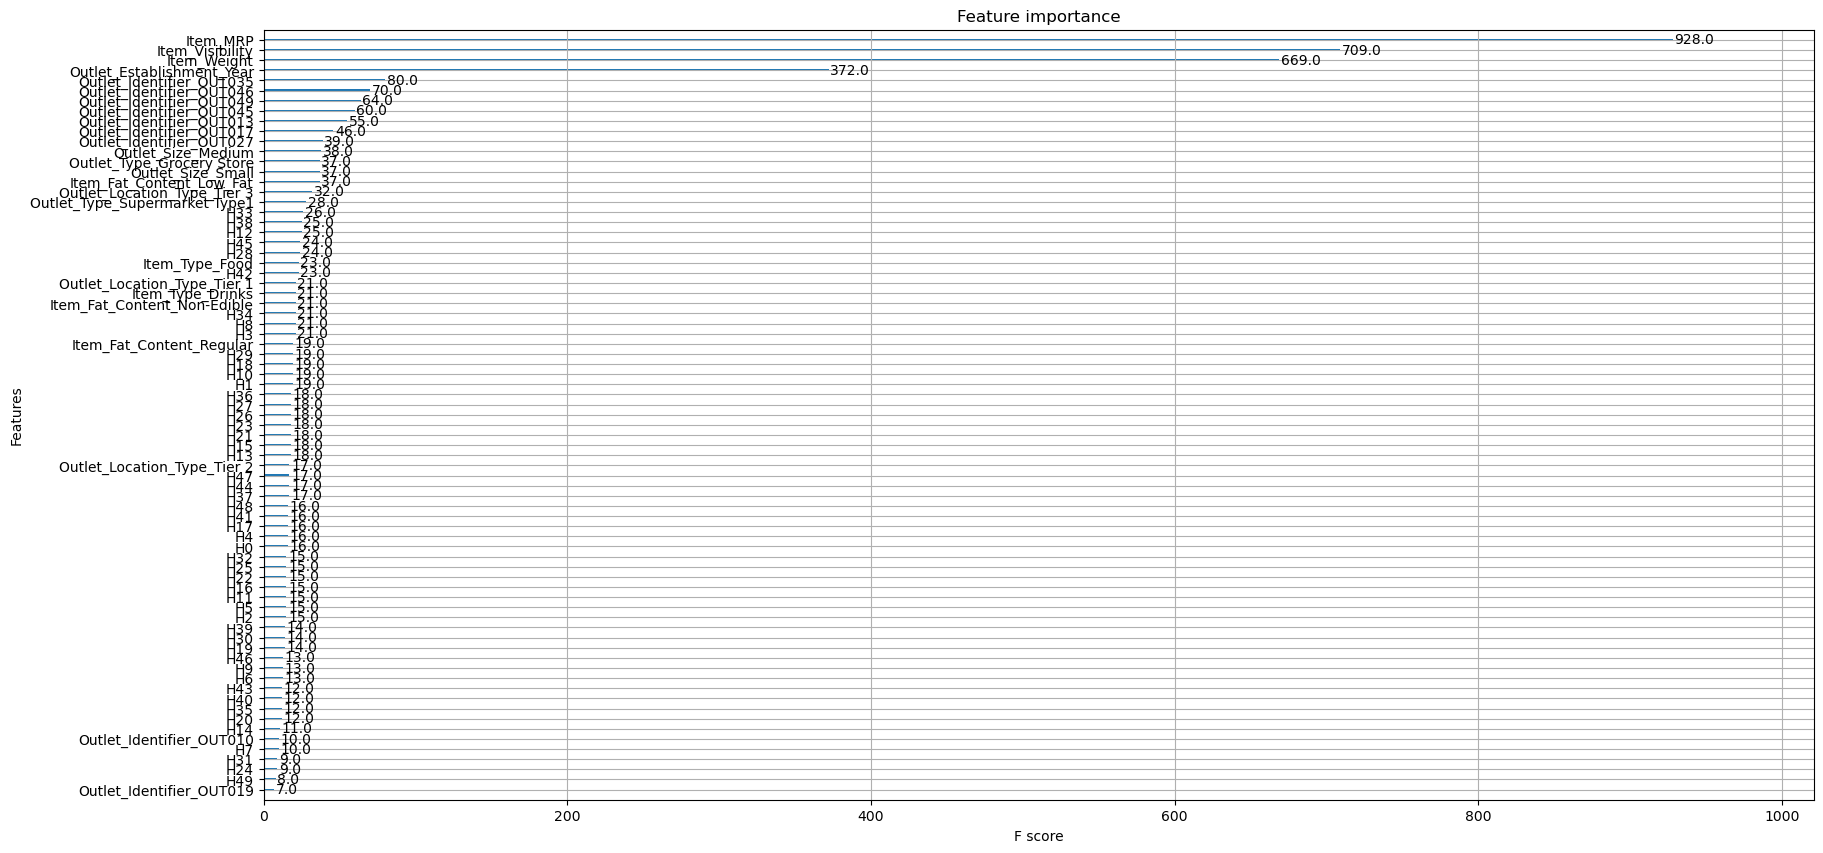

In [127]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1,figsize=(20, 10))
plot_importance(xgr,ax=ax)